In [1]:
import sys
sys.path.append('C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive')
print(sys.path)  # Esto mostrará todas las rutas en sys.path

from model.training import ModelTrainer 
from model.inferences import ModelMetrics
from model.utils.data_extraction import DataExtractor
import numpy as np


['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv', '', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\Pythonwin', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive']


In [2]:

trainer = ModelTrainer()
model = trainer.run()


|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.9947    | 0.08116   | 47.78     | 758.8     |
| 2         | 0.9948    | 0.1237    | 12.02     | 240.4     |
| 3         | 0.9946    | 0.02104   | 43.98     | 641.0     |
| 4         | 0.9954    | 0.1445    | 5.926     | 972.9     |
| 5         | 0.9947    | 0.1682    | 14.56     | 263.6     |
| 6         | 0.9946    | 0.1199    | 49.38     | 999.9     |
| 7         | 0.9954    | 0.1729    | 5.748     | 973.7     |
| 8         | 0.9952    | 0.1766    | 5.545     | 924.8     |
| 9         | 0.9946    | 0.1696    | 49.79     | 879.8     |
| 10        | 0.9949    | 0.07624   | 6.657     | 137.9     |
| 11        | 0.9959    | 0.01152   | 6.065     | 454.4     |
| 12        | 0.9954    | 0.01081   | 49.72     | 448.9     |
| 13        | 0.9954    | 0.01993   | 5.459     | 498.6     |
| 14        | 0.9957    | 0.1817    | 6.32      | 413.3     |
| 15    

In [3]:
nameFile = DataExtractor.save_model('../trained/', model, 'stacking_model.pkl')

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv', '', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\juans\\OneDrive\\Documentos\\iaProyect\\Cognitive\\.venv\\Lib\\site-packages\\Pythonwin', 'C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive', 'C:/Users/juans/OneDrive/Documento

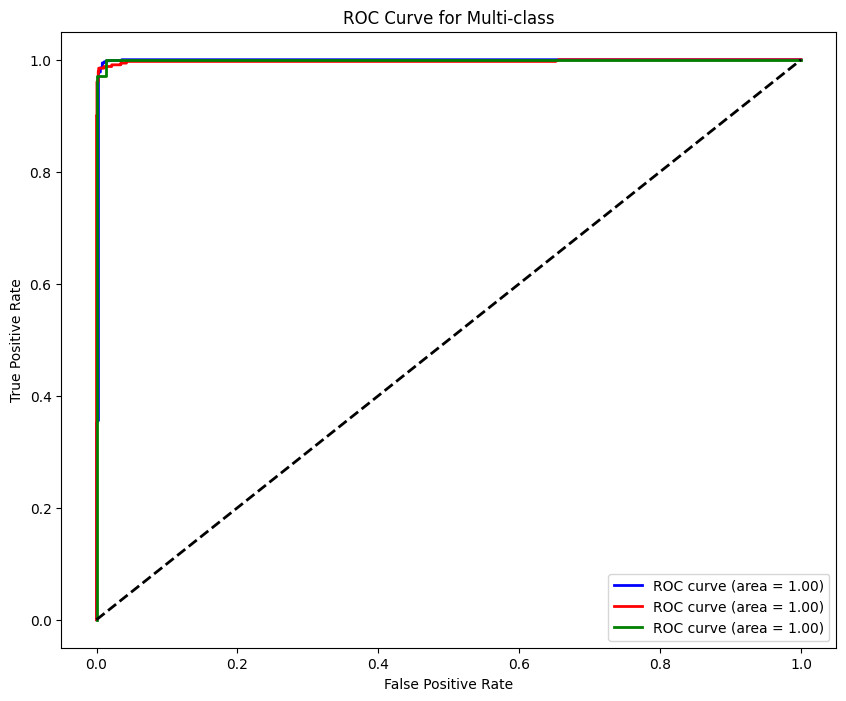

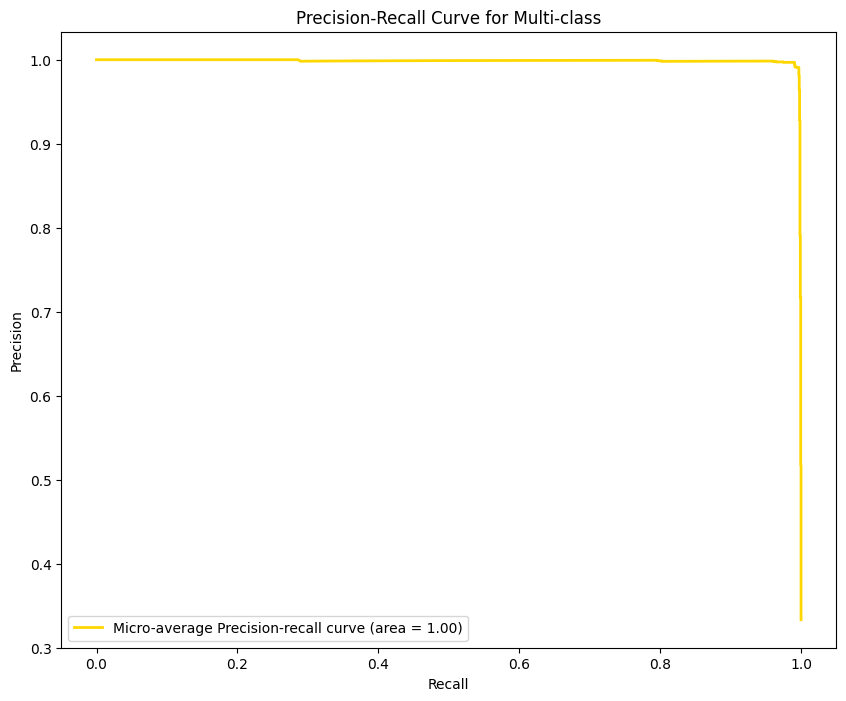

F1 Score: 0.98


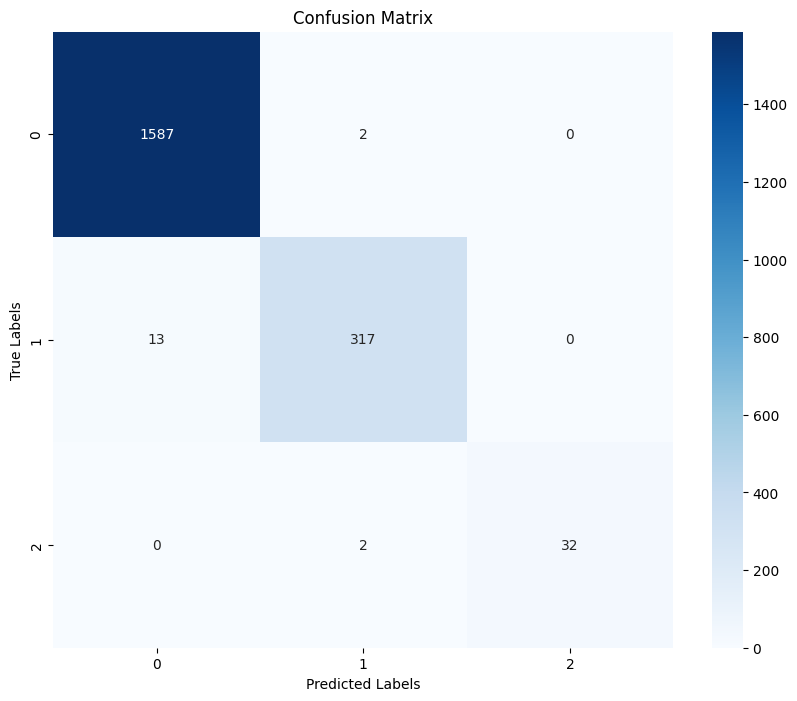

In [4]:
import sys
sys.path.append('C:/Users/juans/OneDrive/Documentos/iaProyect/Cognitive')
print(sys.path)  # Esto mostrará todas las rutas en sys.path

from model.training import ModelTrainer 
from model.inferences import ModelMetrics
from model.utils.data_extraction import DataExtractor
from sklearn.model_selection import train_test_split
import numpy as np

nameFile = 'stacking_model.pkl_2024-09-04_14-30-13.pkl'

# Supón que ya has cargado tus datos y entrenado tu modelo, entonces puedes hacer lo siguiente:
data = DataExtractor.load_data_pickle('../../data/','DB sin RM (filtrado) - normalizado 01.pkl')

test_data,aux_data = train_test_split(data, test_size=0.7, random_state=42)
new_X_test = aux_data.drop(columns=['Deterioro Cognitivo'])
new_y_test = aux_data['Deterioro Cognitivo']

n_classes = len(np.unique(new_y_test))

modeltrainer = DataExtractor.load_model('../trained', nameFile)
metrics = ModelMetrics(modeltrainer, new_X_test, new_y_test, n_classes)
metrics.print_classification_report()
metrics.plot_roc_curve()
metrics.plot_precision_recall_curve()
metrics.print_f1_score()
metrics.plot_confusion_matrix() 
